In [7]:
#import chunk
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter, find_peaks
matplotlib.style.use('ggplot')

# enable zooming into graphs
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 5) 

In [8]:
#import data into 

# use the copy data for visualization and analysis
log_filename = "data/Accelerometer_GoodJump1 copy.csv"
log_filename2 = "data/Accelerometer_BadJump1 - Copy.csv"

raw_data = np.loadtxt(log_filename, delimiter=',', unpack=True, skiprows=0)
(timestamps, seconds_passed, x_data, y_data, z_data) = raw_data

signal = np.sqrt(x_data**2 + y_data**2 + z_data**2)

# start timestamps from zero (assume timestamps are in milliseconds)
c = timestamps[0]
timestamps = (timestamps - c)
signal = signal[1000:2000]
timestamps = timestamps[1000:2000]
##########################################################BAD JUMPS###########################

raw_data2 = np.loadtxt(log_filename2, delimiter=',', unpack=True, skiprows=0)
(timestamps2, seconds_passed2, x_data2, y_data2, z_data2) = raw_data2

signal2 = np.sqrt(x_data2**2 + y_data2**2 + z_data2**2)

# start timestamps from zero (assume timestamps are in milliseconds)
c2 = timestamps2[0]
timestamps2 = (timestamps2 - c2)
signal2 = signal2[1000:2000]
timestamps2 = timestamps2[1000:2000]

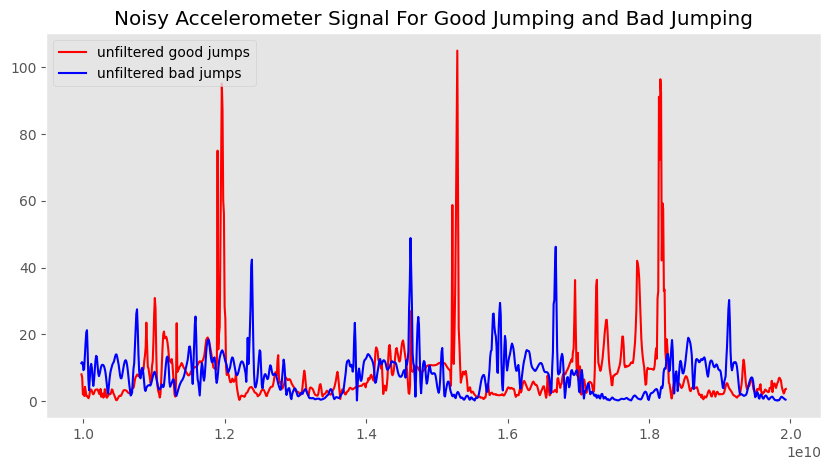

In [9]:
# Plot accelerometer data
plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label="unfiltered good jumps")
plt.plot(timestamps2, signal2, 'b-', label = "unfiltered bad jumps")
plt.title("Noisy Accelerometer Signal For Good Jumping and Bad Jumping")
plt.legend(loc = 'upper left')
#plt.grid()
#plt.show()

###############################################

# Plot accelerometer data
#plt.figure(figsize=(10,5))
#plt.plot(timestamps2, signal2, 'b-',label="unfiltered bad jumps")
#plt.title("Noisy Accelerometer Signal During Bad Jumping")
#plt.legend(loc = 'upper left')
plt.grid()
plt.show()

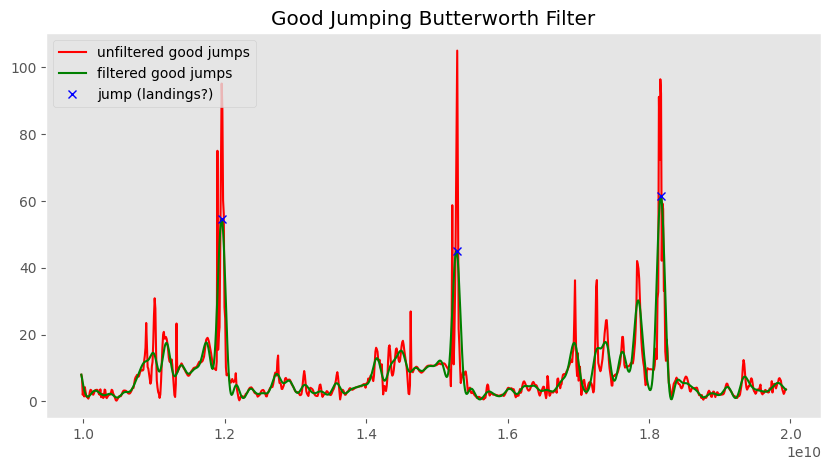

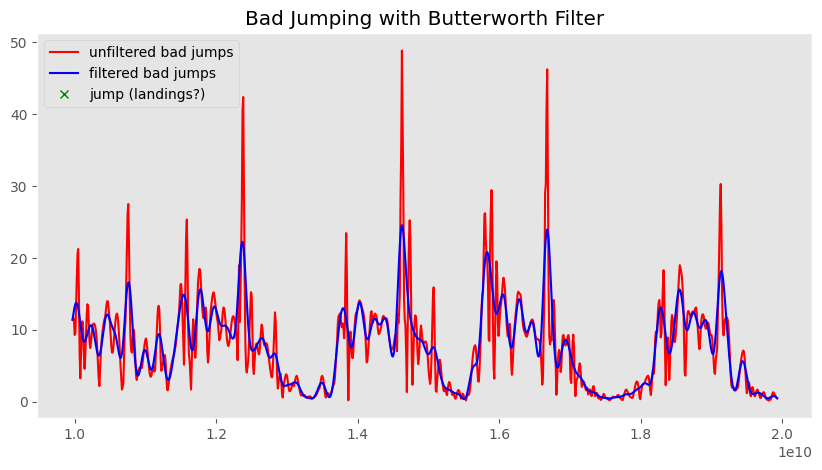

In [10]:
#butterworth filter 
# Filter requirements.
order = 4
fs = 50.0  # sample rate, Hz
cutoff = 2.7 # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
filtered_signal = filtfilt(b, a, signal)
filtered_signal2 = filtfilt(b, a, signal2)

peaks, _ = find_peaks(filtered_signal, height=35)
peaks2, _ = find_peaks(filtered_signal2, height=35)

plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label="unfiltered good jumps")


plt.plot(timestamps, filtered_signal, 'g-',label="filtered good jumps")
plt.plot(timestamps[peaks], filtered_signal[peaks], 'bx', label="jump (landings?)")
plt.title("Good Jumping Butterworth Filter")
plt.legend(loc = 'upper left')

plt.grid()
plt.show()

### Bad Jump Plots

plt.plot(timestamps2, signal2, 'r-',label="unfiltered bad jumps")
plt.plot(timestamps2, filtered_signal2, 'b-',label="filtered bad jumps")
plt.plot(timestamps2[peaks2], filtered_signal2[peaks2], 'gx', label="jump (landings?)")
plt.title("Bad Jumping with Butterworth Filter")
plt.legend(loc = 'upper left')

plt.grid()
plt.show()



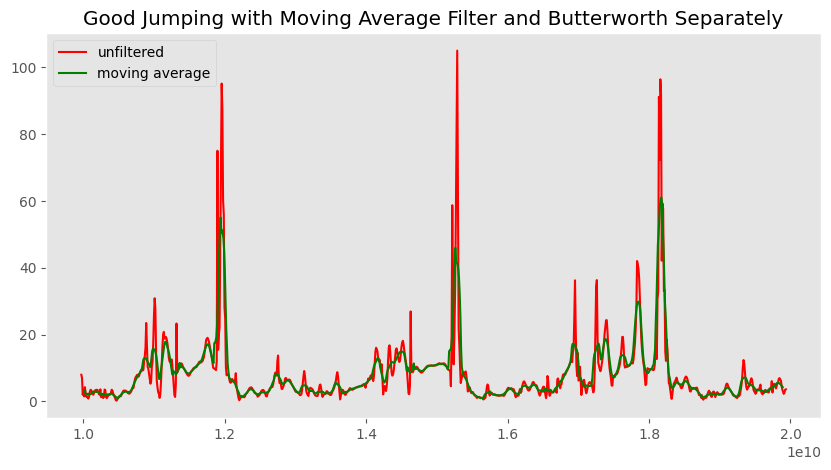

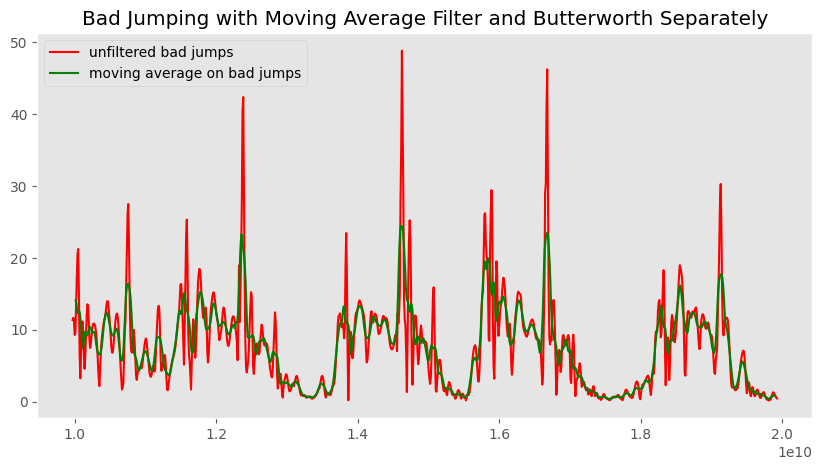

In [11]:
#Moving average filter 

window_size = 10

new_y = np.convolve(signal , np.ones(window_size )/window_size, mode='valid')
new_x = np.convolve(timestamps , np.ones(window_size )/window_size, mode='valid')
plt.figure(figsize=(10,5))
plt.plot(timestamps, signal, 'r-',label="unfiltered")
plt.plot(new_x, new_y , 'g-', label= "moving average")
#plt.plot(timestamps, filtered_signal, 'b--', label='butterworth')
plt.title("Good Jumping with Moving Average Filter and Butterworth Separately")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

###############################################


new_y2 = np.convolve(signal2 , np.ones(window_size )/window_size, mode='valid')
new_x2 = np.convolve(timestamps2 , np.ones(window_size )/window_size, mode='valid')
plt.figure(figsize=(10,5))
plt.plot(timestamps2, signal2, 'r-',label="unfiltered bad jumps")
plt.plot(new_x2, new_y2 , 'g-', label= "moving average on bad jumps")
#plt.plot(timestamps, filtered_signal, 'b--', label='butterworth')
plt.title("Bad Jumping with Moving Average Filter and Butterworth Separately")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

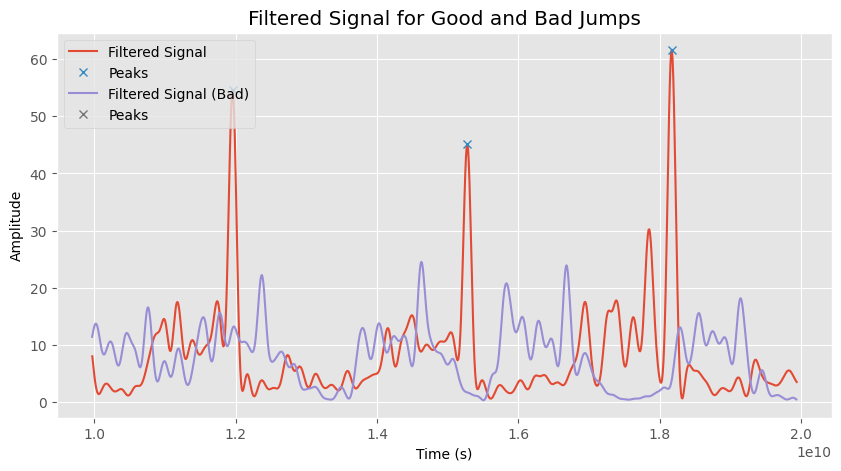

In [12]:
#finding peaks
peaks, _= find_peaks(filtered_signal, height=35)

ibi = np.diff(peaks) / fs

# Plot the filtered signal and peaks
plt.figure(figsize=(10, 5))
plt.title("Filtered Signal for Good and Bad Jumps")
plt.plot(timestamps, filtered_signal, label='Filtered Signal')
plt.plot(timestamps[peaks], filtered_signal[peaks], 'x', label='Peaks')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.legend()
#plt.show()

###################################################################

peaks2, _= find_peaks(filtered_signal2, height=35)

ibi2 = np.diff(peaks2) / fs

# Plot the filtered signal and peaks
#plt.figure(figsize=(10, 4))
#plt.title("Finding peaks in filtered signal (Bad Jumps)")
plt.plot(timestamps2, filtered_signal2, label='Filtered Signal (Bad)')
plt.plot(timestamps2[peaks2], filtered_signal2[peaks2], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left')
plt.show()